# An Introduction To Exploratory Data Analysis and Hypothesis Testing

## EDA (Exploratory Data Analysis)

Understanding the shape of the distribution of your data is an imperative to informing hypotheses about your data.  By understanding the various 1 dimensional projections (aka columns) of your dataset, you'll be able to understand what statistical questions to ask which inform your early analysis.

The true beginning of any data science project _should_ be a conversation, however it's hard to get what you need without anything to show.  Exploratory data analysis is often the trojan horse to learn more of the domain expertise of your data as well as to get to know the client.


If you're stakeholders see that you've done "something" then you get the opportunity to ask important questions like:

* does this sample or this data make sense given what stakeholder expects? 
* do the various columns mean what you think (based on the column names)?

By doing the exploratory data analysis, you can usually get answers to these questions.



## Introductory Techniques

* shape parameters of your distribution
    * measures of centrality
    * measures of spread
    * multiple centriods
* visualizing your dataset
    * histogram plotting
    * scatter plotting
* distributions
    * moment generating functions
        * a generalization of centrality
        * a generalization of spread
    * visualizing the normal distribution
    * visualizing the exponential distribution
    * visualizing the beta distribution
    * Discerning the shape of a distribution in specific
        * MLE


## Hypothesis Testing

* understanding the null and alternative hypothesis
* pvalues and their interpretation
* the statistic of a hypothesis test
* the power of a statistical test
* Example hypothesis tests
    * normality tests
        * Shapiro-Wilk Test
        * D’Agostino’s K^2 Test
        * Anderson-Darling Test
    * Correlation Tests
        * Pearson’s Correlation Coefficient
        * Spearman’s Rank Correlation
        * Kendall’s Rank Correlation
        * Chi-Squared Test
        * point biserial test
    * Parametric Statistical Hypothesis Tests
        * Student’s t-test
        * Paired Student’s t-test
        * 1 Sample T-Test
        * Analysis of Variance Test (ANOVA)
    * Nonparametric Statistical Hypothesis Tests
        * Mann-Whitney U Test
        * Wilcoxon Signed-Rank Test
        * Kruskal-Wallis H Test
        * Friedman Test
        * Kolmogorov-Smirnov statistic on 2 samples
        
        
* a scheme for finding the distribution of your data (Optionally)
    * MLE
    * Sampling in Python when you need to consider multiple columns
    * Analyzing the results of your hypotheses

# References:

[Statistical Tests Cheatsheet](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)

[NIST handbook](https://www.itl.nist.gov/div898/handbook/)

[Vassar Stats Book](http://vassarstats.net/textbook/)

## Shape Parameters

In order to get some information about our distribution of data, we usually start with figuring out the center of our each column in our dataset.  The central tendency of each column of our dataset has a relationship to the "expected value" of the data.  If our data is representative of the underlying population, then the central tendency is a good approxmation of what we can expect of our data over many repeated experiments from the underlying process that generated our dataset.

In [5]:
import numpy as np

arr = np.random.normal(0, 10, size=10)
arr.mean()

-2.6168993195216026

The above gives us the average of ten repeated experiments.  Here the underlying data generation process is assumed to admit "normally" distributed data.  If we want the expected value we need to see how the average converges over many repeated samples from the distribution.

In [9]:
arr = np.random.normal(0, 10, size=100000000)
arr.mean()

0.0016411209873510087

Notice that we use the same method to determined the expected value as we use to determine the average.  Unfortunately, the algorithm for the average used here only works with normally distributed data.  We'll need a broader notion of centrality to capture the expected value of any random variable.

In order to get more information about our distribution we'll ask about how spread out the data is.  This gives us a sense of the scale of the distribution of the data.  The scale or spread of the data can tell us how to compare a given data point against the entire distribution and how typical a given point is.  If a point is far away from the central tendency or expectation then it is likely atypical for the distribution.  If a point is nearby the center, it is likely much more expected.

In [36]:
arr = np.random.normal(0, 10, size=100000)
arr.std()

9.989376571859928

As we can see standard deviation also known as the spread for this random variable is around 10.  What does this mean?  Well we can start to ask questions of our data, like - how likely is it that we get a data point of 10000, given that our data is normally distributed with a mean of 0 and standard deviation of 10 and 100000 data points?

We can start by answering the question visually.

(array([0.0010682, 0.       , 0.       , ..., 0.       , 0.       ,
        0.0010682]),
 array([-51.2438227 , -51.23446116, -51.22509962, ...,  42.35286433,
         42.36222587,  42.37158741]),
 <a list of 10000 Patch objects>)

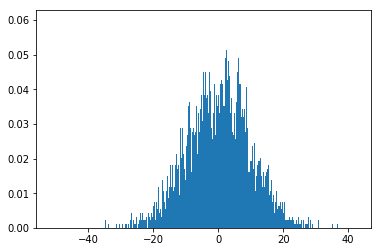

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(arr, bins=10000, density=True)

Given the scale of the distribution - which we can see on the x-axis, clearly the data point of 10000 is well outside what we'd expect for a data point, given this distribution of data.  

## Dealing with data that isn't normally distributed

What happens when our data isn't perfectly normally distributed?  Here's an example dataset that isn't exactly normally distributed:

In [127]:
from scipy.stats import skewnorm

skew_magnitude = 4
arr = skewnorm.rvs(skew_magnitude, loc=0, scale=1000, size=100000)

To generate the above dataset we use a skew normal random variable, one that allows us to pass the third moment of the normal distribution directly.  Because the skew is positive, the tail of our distribution will be on the right.

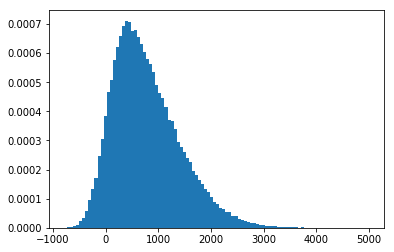

In [128]:
plt.hist(arr, bins=100, density=True)
plt.show()

How might we get a measure of center for a dataset that isn't perfectly normal?  The simple average might give us an approximation of the center:

In [129]:
arr.mean()

775.0773690359506

Let's compare this with what the median produces:

In [130]:
import statistics as st

st.median(arr)

673.6524771212421

In [131]:
skew_magnitude = -4
arr2 = skewnorm.rvs(skew_magnitude, loc=0, scale=1000, size=100000)

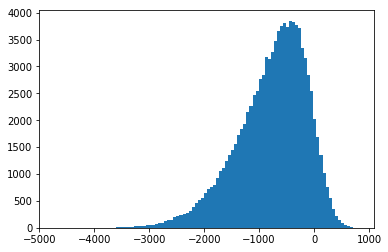

In [132]:
plt.hist(arr2, bins=100, density=False)
plt.show()

In [133]:
arr2.mean()

-771.9201454772459

In [134]:
st.median(arr2)

-672.9753868254722

As you can see here, the mean overstates the central tendency of the dataset by quite a bit!  So this tells us when our assumptions are violated we will need to make use of descriptive statistics which are robust to our assumptions needing to be relaxed



The major reason that the arithemtic mean overstates the average in this case is because of how it treats large values.  Recall the formula for the arithmetic mean:

$$ 1/N \sum_{i=0}^{i=N} X[i] $$

Where X is a list of numbers.



Because the sum treats all values equally, if you have one large number the average can shift by a lot.  

The way that robust descriptive statistics like the median get around this is by looking at the rank of the data.  Here's how this works:

First the data is sorted into ascending order and then different sorted elements are used as alternative measures for centrality and spread.  While not perfectly robust, they do well with a lot of different distributions that are approximately normal but exhibiting some non-normal tendencies either by a non zero skew or a non zero kurtosis.

In [142]:
def interquartile_range(arr):
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    return q3 - q1

print("Median", np.percentile(arr, 50))
print("Interquartile Range", interquartile_range(arr))
print("Mean", arr.mean())
print("Standard Deviation", arr.std())

Median 673.6524771212421
Interquartile Range 840.351319347348
Mean 775.0773690359506
Standard Deviation 633.2153887790821


As you can see, the above robust statistics capture the same information - the center and the spread of the distribution, except because these are rank order statistics, they won't capture any information from the outliers.  This is because they only look at sorted order, these statistics are unaware of bias via outliers.

Another important robust descriptive statistic is the [trimean](https://en.wikipedia.org/wiki/Trimean).

In [144]:
def trimean(arr):
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    median = np.percentile(arr, 50)
    return (q1 + 2*median + q3)/4

print("Trimean", trimean(arr))

Trimean 701.7110944368526


"An advantage of the trimean as a measure of the center (of a distribution) is that it combines the median's emphasis on center values with the midhinge's attention to the extremes."

— Herbert F. Weisberg, Central Tendency and Variability

Before we leave our discussion of central tendency, it is possible that our data will not comfortably conform to one central tendency, it may be the case that multiple central tendencies are present, for this we will introduce the k means algorithm

In [168]:
from sklearn.cluster import KMeans

arr1 = np.random.normal(100, 50, size=10000)
arr2 = np.random.normal(800, 50, size=10000)
multi_center_dist = np.concatenate([arr1, arr2])

means = KMeans(n_clusters=2, 
               random_state=0, 
               max_iter=1000,
               n_init=100,
               tol=0.00001,
               algorithm="full").fit(multi_center_dist.reshape(-1, 1))
means.cluster_centers_

array([[ 99.82624339],
       [799.60974984]])

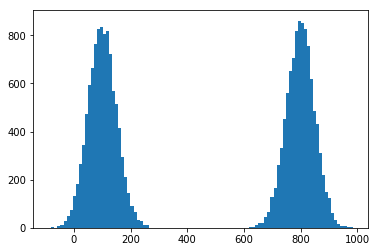

In [169]:
plt.hist(multi_center_dist, bins=100)
plt.show()

In [176]:
from sklearn.cluster import KMeans

arr1 = skewnorm.rvs(-2, loc=200, scale=50, size=1000)
arr2 = skewnorm.rvs(2, loc=800, scale=50, size=1000)
multi_center_dist = np.concatenate([arr1, arr2])

means = KMeans(n_clusters=2, 
               random_state=0, 
               max_iter=1000,
               n_init=100,
               tol=0.00001,
               algorithm="full").fit(multi_center_dist.reshape(-1, 1))
means.cluster_centers_

array([[163.9252768 ],
       [835.22386134]])

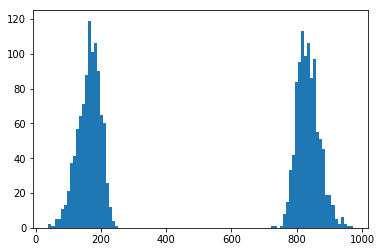

In [177]:
plt.hist(multi_center_dist, bins=100)
plt.show()

As you can see, the K-Means algorithm captures both of the centers of our distribution.  Additionally, KMeans can generalize to $R^{n}$ space, meaning we can capture a sense of a higher dimensional centrality directly, rather than looking at the marginal centrality of different aspects of our dataset. 

## Dealing with 2 Dimensional Data



Thus far we've dealt primarily with 1 dimensional data, so the histogram was simply the right choice.  What happens when we go multi-dimensional?

For this we will need a number of techniques, however the simplest ones involve just visualizing the data.  For this we will need some new visualizations.  In this case we will turn to scatter plots first:

In [3]:
from sklearn import datasets

boston = datasets.load_boston()
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [199]:
import pandas as pd

columns = ["CRIM", "ZN", "INDUS", 
          "CHAS", "NOX", "RM", 
          "AGE", "DIS", "RAD", 
          "TAX", "PTRATIO", "B", 
          "LSTAT"]
df = pd.DataFrame(data=boston.data[:,:], columns=columns) 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


StandardScaler(copy=True, with_mean=True, with_std=True)

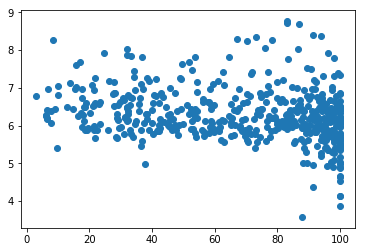

In [212]:
X = df["AGE"].values
Y = df["RM"].values

plt.scatter(X, Y)

From the above data we can actually see something interesting!  As the proportion of houses built before 1940 increases, the number of rooms spreads out significantly.  This means we can say, older houses likely had more rooms possibly because family size was larger and more varied.  As a result when family size stablized around 2 children per household, the number of rooms may have stablized as well.  Also, there is likely a poverty effect here, as American workers made more money, it probably meant fewer homes with a small number of rooms.

Of course, the above is all just guess work, but there is certainly a pattern we can discern from the above picture - the number of rooms in older homes is more varied than newer homes.

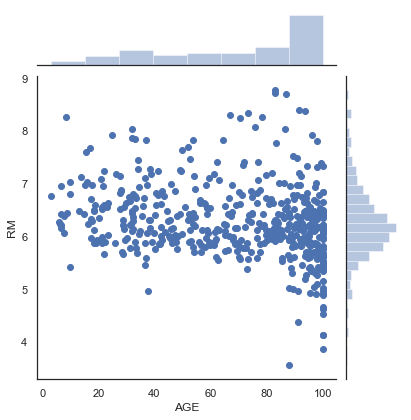

In [216]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.jointplot(x="AGE", y="RM", data=df)
plt.show()

Interestingly, we get a very different picture by looking at the joint plot.  It appears as though most of the homes total that are being shown are in the 90-100% range of being built before 1940.  What this suggests is that the housing stock simply degrades slowly and that there are far fewer new houses than old, which is why the spread of room is so much higher if we account for areas with mostly older homes.

We can easily add a regression line which looks at the distribution of marginal densities:

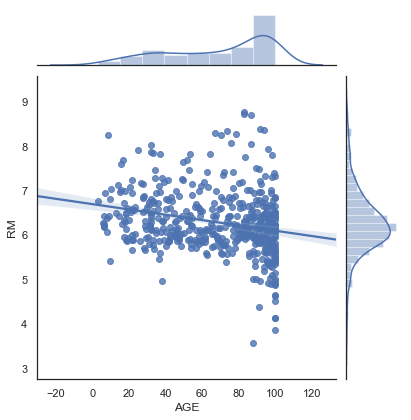

In [217]:
sns.jointplot(x="AGE", y="RM", data=df, kind="reg")
plt.show()

Notice that this visual "model" of our data merely shows us how the data is distributed and where the majority of the data is.  By fitting a line through the data, we can see the slight negative relationship between AGE and number of rooms clearly spelled out.  

Of course, we aren't talking in detail about linear regression here.  So this is merely to show the power of good visualization.

## Finding The Central Tendency and Spread In General

Thus far we have looked at mostly normally distributed data.  Finding the center and spread of the data was relatively straight forward, however that isn't always the case.

The reason it was easy to find the center and spread is because we made an assumption about the shape of the underlying data, namely that it was _normally_ distributed.  What happens if we need to relax that assumption?  How can we talk about centrality and spread in the general setting of any distribution of data.

For this we'll need a more general notion of centrality and spread.  One way to attack this is to assume some underlying function that approximately generates your data and then to come up with another function which acts on this distribution generating function to recover the shape parameters of the distribution.  The first two of these shape parameters are the central tendency and the spread for the distribution.  

The name given to the function that acts on a distribution to recover its shape parameters is called the moment generating function.  For smooth, continuous distribution functions, the moment generating function can generate many moments, by differentiating the distribution function.

While the moment generating function does not exist for all distributions, it exists for many, allowing us to extend our discussion of descriptive statistics to many cases, while abstracting away the details of _how_ we calcuate measures of centrality and spread to, _how_ do we interpret our distribution based on it's shape parameters?

The technical aspects of how to derive said moment generating functions are likely unimportant.  What is interest, is a few of the collaries:

* no two distributions of data calculate the central tendency or spread the same way
* there are potentially many shape parameters associated with each distribution of data that give us tons of information about the data.

## Looking at some specific examples

* Normal Distribution
    * Central tendency: 
    
    $$ 1/n \sum_{i=0}^{i=n} x_{i} $$ 
    
    * Spread: 
    
    $$ 1/n \sum_{i=0}^{i=n}(x_{i} - \mu)^{2} $$
    
* Exponential Distribution

    * Central tendency:
        
       $$ \lambda^{-1} $$
    
    * Spread:
    
       $$ \lambda^{-2} $$
       
* Beta Distribution

    * Central tendency:
    
       $$ \dfrac{\alpha}{\alpha + \beta} $$
    
    * Spread: 

       $$ \dfrac{\alpha\beta}{(\alpha + \beta)^{2}(\alpha + \beta + 1)} $$

What do each of these formulas have in common for each calculation of center and spread?  The answer: Nothing!  They couldn't be more different.  And because of that, we know with some level of certainty that it is an imperative we know what data distribution we are dealing with, if we want to say anything meaningful about our data.

So how do we account for this in our modeling?  By verifying the distribution that our data comes from.  We'll see how to do this a little later on, but for now let's assume that we simply know by visual inspection what our data looks like.  In order to do this, let's look at pictures of the three distributions listed above:

In [344]:
normal_dist = np.random.normal(0, 1, size=10000)
exponential_dist = np.random.exponential(0.5, size=10000)
beta_dist = np.random.beta(1, 3.25, size=10000)

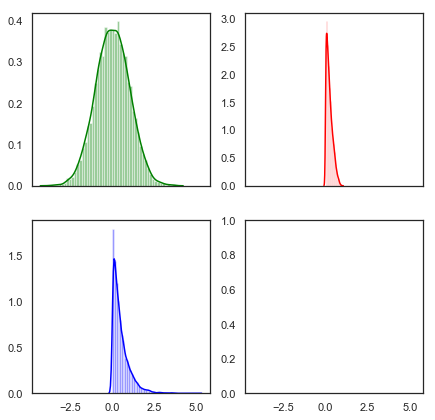

In [345]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( normal_dist , color="green", ax=axes[0, 0])
sns.distplot( exponential_dist , color="blue", ax=axes[1, 0])
sns.distplot( beta_dist , color="red", ax=axes[0, 1])

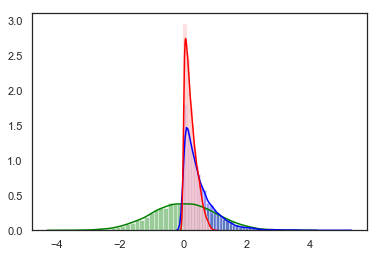

In [346]:
sns.distplot( normal_dist , color="green")
sns.distplot( exponential_dist , color="blue")
sns.distplot( beta_dist , color="red")

plt.show()

Note the distinctive shapes for each distribution - 

The normal distribution, shown in green, is fairly spreadout and data is evenly distributed with a bulge at the center.

The beta distribution, shown in red has the highest peak and the smallest spread.  This makes beta distributions ideal for bayesian inference, because the majority of the data falls in a small area.  It's important to note, as the shape parameters for the distribution change, the beta distribution can actually take on a lot of different shapes.

Finally, in blue, the exponential distribution falls inbetween the shape of the beta and normal distribution, some of it's data hovers in one area, but then the other half has a long tail, which more closely resembles the density of the normal distribution in spread.

In fact, as the exponential distribution heads towards a shape parameter of 2, it closes resembles at standard normal variable (with mean 0 and variance 1):

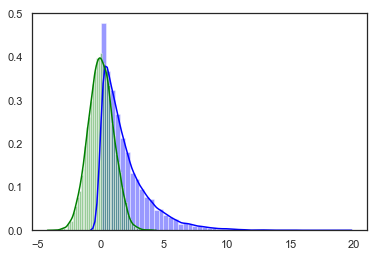

In [385]:
normal_dist = np.random.normal(0, 1, size=10000)
exponential_dist = np.random.exponential(1.9, size=10000)
sns.distplot( exponential_dist , color="blue")
sns.distplot( normal_dist , color="green")

plt.show()

Before we leave the topic of distributions, let's discuss a powerful techniques for finding the shape parameters of sample data that we believe belongs to the population distribution (spoiler: it also has many other use cases).

For example assume that we only have a sample of 100 students, that we believe are normally distributed and we would like to figure out the shape parameters for the population.  We can use a technique called maximum likelihood estimation to discern these parameters.  MLE is used for a variety of different learning tasks, including ordinary least squares amongst others.  For now, we will concern ourselves with just using it to fit the shape parameters of a population distribution given a sample:

In [394]:
students_tests = np.random.normal(70, 15, size=110)
students_tests = students_tests[students_tests < 100]
students_tests = students_tests[np.random.randint(0, 100, size=100)]

In [401]:
from scipy import stats

stats.norm.fit(students_tests)

As you can see, we recover the most likely population shape parameters from the sample of 100 students!  Many of the scipy.stats distributions have this fit parameter, allowing us to estimate the likely shape parameters of a population distribution given a sample.  One of the caveats of MLE is it works well when our sample dataset is "big enough" where "big enough" is a vague term.  A general rule of thumb, is you should be able to see the shape of the sample distribution and verify it appears to follow a specific distribution.  Of course, as we'll see next, statistical tests for the shape of a distribution are also an imperative.

## Hypothesis Testing

Now that we know some stuff about distributions, descriptive statistics and how they work, let's go ahead and dive into some hypothesis testing!  Hypothesis testing will allow us to make substatitive claims about our data, and tell us whether our assumptions are right or wrong.  The power of science, is if you are careful, you get to know things about the world by just making sense of it!

## Conformitory Analysis

### Null and Alternative Hypothese

$ H_{0}:$ The null hypothesis is the statement under defense by the statistical test.  It is the claim to accept or reject.

$ H_{A}:$ The alternative hypothesis is the alternative to the null hypothesis.  If the null hypothesis is false, this statement is believed to be true.


In the general case conformitory analysis is about validating our assumptions or rejecting them against evidence (aka data).  In the general sense, the way hypothesis tests are formed is you have two hypotheses:


### P-Values and their Interpretation

The p-value of test is the probability that the null hypothesis is true.  If the P-Value is close to zero then the test fails and the alternative hypothesis is accepted.  Because the p-value is a just a number, we need to consider different tolerance levels when looking at a p-value.  For certain cases, when we need to be absolutely certain, we demand a higher p-value, however when we can be more lax, we require a lower p-value.

There are a number of factors that may require higher or lower p-values and the issue is they are very often domain specific.  That said, most hypothesis tests are usually fairly straight forward and therefore we are usually able to quickly accept or reject the null hypothesis.

### Statistics of a Test

Often times statistical tests will come with a "statistic" giving more information about the statistical test, as well as cases that the test may miss, but likely signal a false positive.  The test for normality of a sample distribution often falls subject to false positives, so the statistic here is essential to diagnosing said issues.

### Statistical Power of a Test

Statistical power of a test is the inverse of the likelihood of getting a false negative - the probability of failing to reject a null hypothesis that is false.  So, we are more likely to trust a test with more statistical power, at least against failing to reject the null hypothesis when it is indeed false.

Now that we have those defintions out of the way, we are ready to dive into some tests!

## normality tests

* Shapiro-Wilk Test
* D’Agostino’s K^2 Test
* Anderson-Darling Test

The three tests we will look at first, will tell us if our distribution is normally distributed.  They all ask the question in slightly different ways.  If we want to be truly sure that a distribution is normally distributed then we should run all three of these tests.

### Shapiro-Wilk Test

The shapiro-wilk test asks the question:

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.  In this case the statistic W gives more evidence towards or against the null hypothesis.  For small values of W, the distribution is likely not normally distributed.

In [404]:
from scipy.stats import skewnorm
from scipy import stats

distribution = skewnorm.rvs(5, loc=0, scale=2, size=10000)
stats.shapiro(distribution)

/usr/local/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Here we see a W of close to 1 and a p-value of "near" zero.  with a p-value close to zero we can empathatically reject the null hypothesis, when this is the case, the statistic is usually of little consideration.  This data is definitely not normally distributed.  Now let's see what a normally distributed sample does:

In [428]:
norm_dist = np.random.normal(0, 10, size=100000)
stats.shapiro(norm_dist)

/usr/local/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Here we see the statistic is close to 1 again, yielding little information.  However, we can say with 64% confidence that this data is normally distributed and therefore we fail to reject the null hypothesis!  This does not mean our data is in fact normally distributed though.  Just that we lack the evidence to reject the null hypothesis.  Science is about skepticism!

### D’Agostino’s K^2 Test


The D'Agostino $K^{2}$ test often referred to just as the test for normality is the defacto standard in many statistical packages.  

D'Agostino's Test tests the null hypothesis that sample data is drawn from a normal distribution. 

If this sounds like exactly the same phrasing as null hypothesis for Shapiro-Wilk, that's because it is.  The only difference between these two tests, is how it tests the null hypothesis as well as the returned statistic.  Here the statistic is the sum of: $ skew^{2} + kurtosis^{2} $.  If the statistic is larger, then we have less confidence that the sample data is normally distributed, because when skew and kurtosis are close to 0 then we are dealing with a normal distribution.

In [420]:
stats.normaltest(distribution)

NormaltestResult(statistic=1037.5339939355522, pvalue=5.039133027222937e-226)

Here we have a reasonably small statistic and an extremely small pvalue, so we can likely say this dataset is somewhat skewed and definitely not normal.

Next let's see how the test does against truly normally distributed data:

In [429]:
stats.normaltest(norm_dist)

NormaltestResult(statistic=1.3806430619570775, pvalue=0.5014148227459898)

Here we fail to the reject the null hypothesis and our statistic is very, very small implying this data is most likely normally distributed.  Note that we somewhat less empathatically reject the null hypothesis, with a p-value of 50%.  But still it is well above the margin for rejecting so it doesn't really matter.  We do get more information out of the statistic, which I believe is why D'Agostino's test is preferred.

### Anderson-Darling Test

The third and finally test of normality we'll look at is the Anderson-Darling test for normality.  The reason for it's inclusion in this section, is because though it's null hypothesis is more general, it can be used to test for normality, as well as other distributions.  The Anderson-Darling tests the null hypothesis that a sample is drawn from a population that follows a particular distribution.

This test returns a statistic, a set of critical values as well as a significance level.  

So for this test we look at the statistic and compare it against the critical values, if the absolute value of the test statistic is greater than the critical value, then we reject the null hypothesis.  The significance level tells how confidently we can reject or fail to reject the null hypothesis.

In [430]:
stats.anderson(distribution)

AndersonResult(statistic=115.46838451595795, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

With a statistic of 115, which is greater than 1.092 we can reject the null hypothesis with 99% significance (or at the 1% confidence level).

In [431]:
stats.anderson(norm_dist)

AndersonResult(statistic=0.328467715124134, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Here with a statistic of 0.328 we fail to reject the null hypothesis with 99% significance (or the 1% confidence level).

## Correlation Tests

Tests of correlation ask the question - how statistically correlated are two variables.  Correlation asks the questions how do two variables covary over a range of values?  Correlation can be an indicator of a casual relationship, because two variables cannot have a casual relationship, if they do not covary.  Much like the case with the statistical tests above, if two variables are correlated that merely means we fail to reject the fact that there is a casual relationship, not that there is in fact a casual relationship.

This leads us to the important attage - correlation does not imply causation, but I would add, it helps us indicate possible causation.


### Pearson's Correlation Coefficient

The Pearson coefficient measures the linear relationship between two datasets.  One of the requirements of the pearson test is that both datasets be normally distributed, otherwise you cannot trust the results of the test.  

Given normality - pearson returns the pearson's correlation coefficient and the 2-tailed p-value.  Here the null hypothesis is that the two variables are uncorrelated.  Note, that this is for the scipy implementation, there are actually more than a few tests one can use in conjunction with pearson's correlation coefficient.  Some of which do not require the normality assumption.  Due to time constraints we won't go through them here, but I recommend the wikipedia article found here: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient if you are interested.

One final thing to mention, pearson's correlation coefficient is immune to changes in center or spread.  It is the distribution of the underlying data that is being measured.

So let's see if some data is correlated.

In [27]:
def linear_shift(data):
    return data*2 + 5

data = np.random.normal(50, 10, size=10000)
shifted_data = linear_shift(data)

In [29]:
print(stats.normaltest(data))
print(stats.normaltest(shifted_data))

NormaltestResult(statistic=1.189576984761279, pvalue=0.551679237891141)
NormaltestResult(statistic=1.189576984761279, pvalue=0.551679237891141)


In [30]:
stats.pearsonr(data, shifted_data)

(1.0, 0.0)

this shows us that the data is perfectly correlated and also illustrates that the center and spread of the data do not effect the correlation.  Now let's try to apply the pearson correlation to some real world data.

In [3]:
from sklearn import datasets
import pandas as pd
boston = datasets.load_boston()

print(boston["DESCR"])
columns = ["CRIM", "ZN", "INDUS", 
          "CHAS", "NOX", "RM", 
          "AGE", "DIS", "RAD", 
          "TAX", "PTRATIO", "B", 
          "LSTAT"]

df = pd.DataFrame(data=boston.data[:,:], columns=columns) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
from scipy import stats

for column in df.columns:
    if stats.normaltest(df[column])[1] > 0.1:
        print(column)

We first ask if our data is normally distributed.  None of it is, so we have low expectations for the pearson correlation.

In [5]:
from scipy import stats

stats.pearsonr(df["PTRATIO"], df["DIS"])

(-0.2324705424082566, 1.2299198506760132e-07)

As you can see the p-value is very small, unsurprisingly, meaning that we reject the null hypothesis and therefore the relationship between pupil-teacher ratio and distance from a city center is a meaningful linear relationship.  We can verify this by looking at a plot of the two datasets:

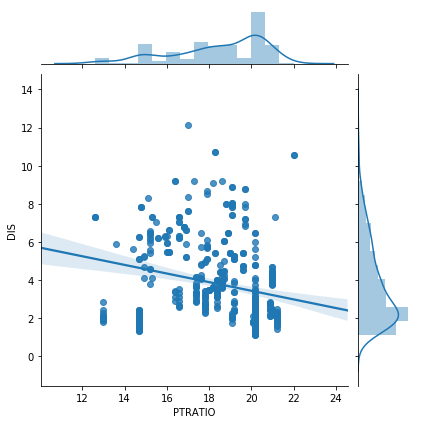

In [34]:
sns.jointplot(x="PTRATIO", y="DIS", data=df, kind="reg")
plt.show()

Despite having low confidence going in, there is clearly a relationship between the two datasets as indicated by their histogram plots - the data is clearly very similarly distributed, which is likely what the pearson correlation coefficient is picking up on.  Additionally, the negative relationship is highlighted by the downward sloping line.  However, we shouldn't really can't strongly interpret our results as you can see from the data.  The scatter plot reveals that our data is basically just randomly distributed in two space.  So even though there is likely some sort of correlation between the variables, there is definitely not a strong linear correlation between the variables.

### Spearman's Rank Correlation

The Spearman's Rank Correlation is a measure the monotonicity of the relationship between two datasets.  Unlike pearson, spearman does not require the normality assumption.  This is because like with median, we only look at the rank order of the two distributions, allowing us to relax the normality assumption.  What we are testing for here, is a monotonic relationship - as X increases, so will Y, if X and Y are the two variables in question.

The p-value indicates the probability of an uncorrelated system producing a dataset that have a Spearman correlation at least as extreme as the one produced.  So the null hypothesis is that the data is uncorrelated and small p-values would indicate there is a correlation.

Let's look at a worked example first and then return to our dataset.

In [35]:
stats.spearmanr(data, shifted_data)

SpearmanrResult(correlation=1.0, pvalue=0.0)

As you can see, the correlated dataset has a p-value of zero therefore we can say there is a strong correlation.

In [36]:
stats.spearmanr(df["PTRATIO"], df["DIS"])

SpearmanrResult(correlation=-0.32204056038369144, pvalue=1.1284771654916052e-13)

As you can see, the p-value is extremely low so we can say the  data is definitely monotonically correlated.  Another question we can ask as a follow on, do they follow the same distribution?  We'll be able to ask that with one of the tests below.

As you can see, the correlation is negative, implying that as distance from a city center increases the pupil teacher ratio decreases.  This likely has to do with wealthier areas spending more money at the town level on education, which means there are likely more teachers hired for wealthier areas.

### Kendall's Rank Correlation

Kendall's Rank correlation looks at the correlation between ordinal data.  Ordinal data is categorical data with an ordering - think low, medium and high.  Kendall's Rank correlation does not assume a normal distribution, so it can be used for any ordinal dataset.  The null hypothesis states that the two variables are statistically independent. 

Kendall's Rank Correlation may appear to have the weakest statistical assumption, but in fact, Kendall's tau and Spearman's rho are both special cases of a general correlation coefficient.  There null hypotheses are somewhat different, in the sense that one is about drawing from an uncorrelated system while the other is with respect to the statistical independence of variables, but these are clearly related concepts.  The mathematical formulation varies, but the concepts are inextriably linked, which at some point is what Kendall showed.

In [44]:
stats.kendalltau(data, shifted_data)

KendalltauResult(correlation=0.9999999999999999, pvalue=0.0)

As you can see, the p-value is close to zero so there is definitely a statistical dependence here.  Let's look at our dataset, to see if we confirm the results with spearman:

In [45]:
stats.kendalltau(df["PTRATIO"], df["DIS"])

KendalltauResult(correlation=-0.2234857322980714, pvalue=5.178627395656323e-13)

In [11]:
first = list(range(100))
second = list(range(100))
stats.kendalltau(first, second)

KendalltauResult(correlation=1.0, pvalue=2.143020576250934e-158)

In [12]:
first = list(range(100))
second = first[::-1]
stats.kendalltau(first, second)

KendalltauResult(correlation=-1.0, pvalue=2.143020576250934e-158)

In [15]:
first = np.random.random(size=100)
second = np.random.random(size=100)
stats.kendalltau(first, second)

KendalltauResult(correlation=0.05050505050505051, pvalue=0.4565563844206484)

As we can see, the correlation is a little weaker but the p-value conforms to the analysis shown in spearman.  We reject the null hypothesis, therefore Kendall's test confirms there is a dependence relationship between pupil teacher ratio and distance from a work center and the relationship is negatively correlated.

### Chi-Squared Contingency Table Test

```
-------------------------------------------------------
A \ B            | B-First Category | B-Second Category
----------------------------------------------------
A-First Category |    10            |     12
----------------------------------------------------
A-Second Category|    20            |     7
----------------------------------------------------
A-Third Category |    37            |     18 
----------------------------------------------------
```


So far we've looked strictly at the correlation of continuous variables.  Now we will introduce our first measure for categorical variables.  The Chi-Squared Contingency Table Test looks at the result of a contingency table - which looks at the sum of frequency counts of categorical variables taken together.  For instance:

As you can the upper left column is the sum of the rows where A is in the first state and B is in the first state.  We can interpret all the other cells equivalently.

The null hypothesis states that the two variables are independent.  The chi2 statistic is the variance in observed versus expected outcome for each category of data.

In [48]:
import pandas
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

test_df = pandas.DataFrame([[0, 1], [1, 0], [0, 2], [0, 1], [0, 2]], columns=['var1', 'var2'])
chi2, p, dof, ex = chisq_of_df_cols(test_df, 'var1', 'var2')

chi2, p

(5.000000000000001, 0.08208499862389874)

In [51]:
ex.T

array([[0.8, 1.6, 1.6],
       [0.2, 0.4, 0.4]])

Here the p-value is above the 0.05 level so we fail to reject the null hypothesis.  We see the expected values returned by the chi-squared test.  We can generate the contingency table directly with:

In [50]:
pandas.crosstab(index=test_df['var1'],columns=test_df['var2'])

var2  0  1  2
var1         
0     0  2  2
1     1  0  0

### Point Biserial Correlation

The final correlation technique we will look at is comparing a categorical and continuous variable.  The point biserial is a special case of the pearson correlation coefficient, so it can be interpreted the same way, except one of the variables is assumed to be categorical and the other assumed to be continuous.

Therefore the null hypothesis is that our data is independent. 

In [63]:
df["hi_low"] = (df["PTRATIO"] > 15)

In [64]:
stats.pointbiserialr(df["hi_low"], df["PTRATIO"])

PointbiserialrResult(correlation=0.7022280438178985, pvalue=2.1794165512033122e-76)

First off, we can clearly see the pvalue is very small, so we can reject the null hypothesis.  There is clearly a relationship here.  Notice here the correlation is positive, this is implies that a value of True is related to the pupil teacher ratio is higher.  So when creating dummy variables, we need be careful when assigning the boolean values.

## Parametric Statistical Tests

Parametric statistical tests are tests that assume that we have certain parameters that come from a normal distribution.  In this case the parameters in question are the shape parameters of the distribution.  We use these to build out the follow statistical tests.


### Student's T-Test

Student's T-Test is extremely flexible and comes in many flavors.  We'll look at a few of them here, specifically the t-test for independence:

null hypothesis - that 2 independent samples have identical expected values.

In [86]:
def adding_noise(x):
    return np.random.normal(0, 1) + x

sample_one = np.random.normal(0, 10, size=100000)
sample_two = adding_noise(sample_one)
stats.ttest_ind(sample_one, sample_two)

Ttest_indResult(statistic=-4.76781451271359, pvalue=1.8636586940807554e-06)

Here we reject the null hypothesis that the expected value of the distribution is the same.  Which tells us these are likely drawn from different distributions.  Note the importance of the expected value being measured instead of the mean or simple average.  This is a question about the asymptotic behavior of the samples, not the individual samples themselves, so it's possible the data may actually still have the same sample means, but different population mean.


### Paired T-Test

Next let's look at a variant of the t-test that assumes a dependence relationship.  The null hypothesis is that 2 related samples have identical expected values:

In [87]:
stats.ttest_rel(data, shifted_data)

Ttest_relResult(statistic=-548.8670959933743, pvalue=0.0)

We empathetically reject the null hypothesis, which means these two samples do not have the same expected value.  

## 1 Sample T-Test

Next lets look at the 1 sample t-test which states the null hypothesis that the expected value of a sample of independent observations a is equal to the given population mean.

What we are really asking, is given a population, is this sample really representative?

In [89]:
data_frame = pd.DataFrame()
data_frame["data"] = np.random.normal(0, 10, size=10000)
sample = data_frame.sample(n=1000, replace=True)
stats.ttest_1samp(sample["data"], data_frame["data"].mean())

Ttest_1sampResult(statistic=-1.5584955967053906, pvalue=0.11943252998120431)

We fail to reject the null hypothesis and therefore the sample is likely drawn from the population.  (Hooray)

## ANOVA Test

The one-way ANOVA test's null hypothesis states that two or more groups have the same population mean.  Here the statistic is the ratio of the two variances from the samples.  So if the ratio is very large or very small, we might reject the null hypothesis, even if it appears to be true.

In [18]:
import pandas as pd
import numpy as np

data_frame = pd.DataFrame()
data_frame["data"] = np.random.normal(0, 10, size=10000)
sample1 = data_frame.sample(n=1000, replace=True)
sample2 = data_frame.sample(n=1000, replace=True)
stats.f_oneway(sample1["data"], sample2["data"])

F_onewayResult(statistic=0.18156438532995503, pvalue=0.6700781638701783)

We fail to reject the null hypothesis, so the two samples come from the same population distribution.  When looking at linear regression we make use of the ANOVA or F-Test to see if the joint population parameters all come from the same distribution.  If they do, then we believe they are statistically correlated and therefore dependent on one another.  So if we fail to reject the null hypothesis in a linear regression context, that means all our variables are statistically related, and therefore cannot be used jointly in a regression context.

## Non-Parametric Statistical Hypothesis Tests

The final set of statistical tests we'll look at of a non-parametric flavor.  These tests don't assume a normal distribution or normal distribution shape parameters, _but_ it does assume some stuff.  Sometimes the non-parametric statistical tests have even more stringent assumptions than parametric ones.  So one needs to take care to verify all the underlying assumptions before moving onto non-parametric tests.

### Mann-Whitney U Test

The Mann-whitney U test's null hypothesis states that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample.  This test can be used to determine if two independent samples were selected from populations having the same distribution.

In [92]:
random_sample = np.random.normal(0, 1, size=10000)
exponential_sample = np.random.exponential(15, size=10000)
stats.mannwhitneyu(random_sample, exponential_sample)

MannwhitneyuResult(statistic=2535850.0, pvalue=0.0)

With a p-value at close to zero we reject the null hypothesis - so these random variables likely don't come from the same population distribution.  We can now return to our question from our dataset, and ask if these belong to the same or similar distributions!

In [93]:
stats.mannwhitneyu(df["PTRATIO"], df["DIS"])

MannwhitneyuResult(statistic=0.0, pvalue=1.1310590056134751e-167)

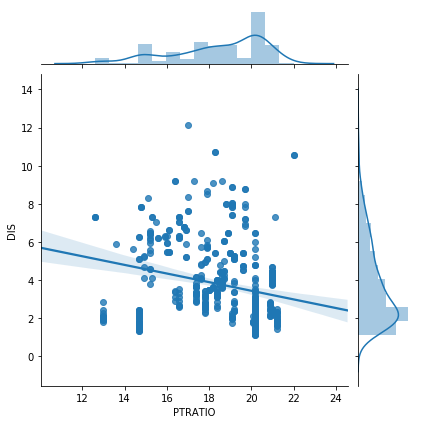

In [98]:
sns.jointplot(x="PTRATIO", y="DIS", data=df, kind="reg")
plt.show()

With a very small p-value we reject the null hypothesis!  And therefore though these data appear to have similar shapes, they likely don't come from the same distribution.

### Wilcoxon Signed-Rank Test

The null hypothesis of the wilcoxon signed rank test states that two related paired samples come from the same distribution.  In particular, it tests whether the distribution of the differences x-y is symmetric about zero.

So basically this test assumes a dependence relationship between the variables and then asks if they come from the same distribution.  So, are two related variables in fact different samples from the same distribution?

In [99]:
def adding_noise(x):
    return np.random.normal(0, 1) + x

sample_one = np.random.normal(0, 10, size=100000)
sample_two = adding_noise(sample_one)

stats.wilcoxon(sample_one, sample_two)

WilcoxonResult(statistic=0.0, pvalue=0.0)

Given that the p-value is zero we reject the null hypothesis and therefore the data does not come from distribution.  Let's look at the data we've been playing with to see if the wilcoxon reports anything different:

In [100]:
stats.wilcoxon(df["PTRATIO"], df["DIS"])

WilcoxonResult(statistic=0.0, pvalue=1.3246486262482183e-84)

Even after assuming a dependence relationship between the variables in question, we still cannot conclude they come from the same underlying distribution, because the pvalue is very small.

### Kruskal-Wallis H Test

The Kruskal Wallis H test tests whether the distributions of two or more independent samples are equal or not.

In [101]:
sample_one = np.random.normal(0, 1, size=100000)
sample_two = np.random.normal(0, 1, size=100000)
stats.kruskal(sample_one, sample_two)

KruskalResult(statistic=0.07512314000632614, pvalue=0.7840185259406084)

Here we fail to reject the null hypothesis, therefore it is likely these variables come from the same distribution.  What's powerful about this test, because it is non-parametric is we can also do the following:

In [102]:
sample_one = np.random.exponential(10, size=100000)
sample_two = np.random.exponential(10, size=100000)
stats.kruskal(sample_one, sample_two)

KruskalResult(statistic=0.0058866903418675065, pvalue=0.938842498955204)

Here the statistical test is able to pick on the similarity of distribution despite, the data not being normally distributed!

### Friedman Test

The friedman tests whether the distributions of two or more paired samples are equal or not.  Here the null hypothesis states the distributions of all samples are equal.  Note the use of the word all - that is because the friedman test is for multiple samples - at least 3.

In [104]:
sample_one = np.random.exponential(10, size=100000)
sample_two = np.random.exponential(10, size=100000)
sample_three = np.random.exponential(10, size=100000)
stats.friedmanchisquare(sample_one, sample_two, sample_three)

FriedmanchisquareResult(statistic=2.0544800001662225, pvalue=0.35799366077052663)

We fail to reject the null hypothesis, therefore the samples all come from the same distribution.  We can see the friedman test as the same as the one_way ANOVA F-Test, except relaxing the assumption of normality and therefore it is appropriate to use in the context of statistical tests where the parameters are not normally distributed.

### Kolmogorov-Smirnov statistic on 2 samples

The KS-2 sample test states the following null hypothesis: that 2 independent samples are drawn from the same continuous distribution.

Note that this is not as stringent as the requirements of the Kruskal-Wallis which has a null hypothesis that the samples need be equal.  Therefore the KS 2 sample test is the most general and most flexible.  It simply requires the distributions to be continuous, which is not always possible in the real-world, but is often a reasonable assumption for many examples found in nature.

In [105]:
stats.ks_2samp(df["PTRATIO"], df["DIS"])

Ks_2sampResult(statistic=1.0, pvalue=1.0645374362131656e-223)

Here we again reject the null hypothesis, stating the broadest terms possible, this data is not drawn from the same distribution.  It's not equal, it's not the same even given independence and it's definitely not drawn from the same distribution as KS states.

## A few simple applications of what we've covered

Below we look at two little applications of our work thus far.

The first application allows us to search across a set of distributions and ask the question, does this sample come from  any of these distributions?

In [399]:
from scipy import stats
import numpy as np


def distribution_analysis(data, distributions):
    results = {}
    results["normal_test"] = stats.normaltest(data)
    for name, distribution in distributions:
        # MLE approximation for shape parameters 
        
        shape_parameters = distribution.fit(data)
        shape_parameters = list(shape_parameters)
        if name == 'erlang':
            shape_parameters[0] = int(shape_parameters[0])
            shape_parameters[1] = int(shape_parameters[1])
        if name == 'gausshyper':
            simulation = distribution.rvs(
                shape_parameters[0],
                shape_parameters[1],
                shape_parameters[2],
                shape_parameters[3],
                size=len(data))
        else:
            simulation = distribution.rvs(shape_parameters[0], shape_parameters[1], size=len(data))

        # statistical tests for distribution similarity
        results[name+"_pearson"] = stats.pearsonr(data, simulation)
        results[name+"_spearman"] = stats.spearmanr(data, simulation)
        results[name+"_kruskal"] = stats.kruskal(data, simulation)
        results[name+"_mannwhitneyU"] = stats.mannwhitneyu(data, simulation, alternative="two-sided")
        results[name+"_wilcoxon"] = stats.wilcoxon(data, simulation)
        results[name+"_ks_2sample"] = stats.ks_2samp(data, simulation)
    return results

distributions = [
      ('beta', stats.beta),
      ('cauchy', stats.cauchy),
      ('chi', stats.chi),
      ('chi2', stats.chi2),
      ('dweibull', stats.dweibull),
      ('erlang', stats.erlang),
      ('expon', stats.expon),
      ('fisk', stats.fisk),
      ('foldcauchy', stats.foldcauchy),
      ('foldnorm', stats.foldnorm),
      ('gamma', stats.gamma),
      ('gausshyper', stats.gausshyper),
      ('invgauss', stats.invgauss),
      ('levy', stats.levy),
      ('maxwell', stats.maxwell),
  ]



Our next little tool allows us to select samples that are representative to a population based on 

In [106]:
def ks_selection(sample, df, columns, significance_criteria=0.1):

    test_results = []
    for column in columns:
        pval = stats.ks_2samp(sample[column], df[column]).pvalue
        test_results.append(pval > significance_criteria)
    if all(test_results):
        return sample
    else:
        return ''
    

def moment_differencing_selection(sample, df, moment_values, columns):
    tmp = []
    for column in columns:
        first_moment = abs(sample[column].mean() - df[column].mean())
        tmp.append(first_moment)
    for column in columns:
        second_moment = abs(sample[column].std() - df[column].std())
        tmp.append(second_moment)
    moment_values.append(tmp)
    return moment_values
    
    
def generate_representative_sample(df, columns, sample_size=10000, num_iterations=1000, significance_criteria=0.1):
    """
    This function generates a representative random sample based 
    on specific variables in the data set.
    We attempt two methods:
    - Kolmogorov-Smirnov test as a means of selection
    - moment differencing as criteria for representativeness
    If KS happens to every returns a valid sample,
    that means all the distributions are equal for all variables of consideration.
    If the moment differencing method is used, we search for the sample which minimizes
    difference between the first two moments.
    Notice that we only select on moment differences if ks fails for all generated samples.
    """
    
    possible_samples = []
    moment_values = []
    for _ in range(num_iterations):
        sample = df.sample(sample_size)   
        result = ks_selection(sample, df, columns, significance_criteria=0.1)
        if result != '':
            return result
        possible_samples.append(sample)
        moment_values = moment_differencing_selection(
             sample, 
             df, 
             moment_values, 
             columns)
            
    min_sum = sum(moment_values[0])
    best_sample = possible_samples[0]
    for index, value in enumerate(moment_values):
        if sum(value) < min_sum:
            min_sum = sum(value)
            best_sample = possible_samples[index]
    return best_sample

please note, these "applications" are naive.  If you want to do this in a production context, I recommend kernel density estimation, a mixture model, or some other technique for density estimation from data.  I will be covering these topics in another chapter (yet to be added).